# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** ZidanAlfarizaPutraPratama
- **Email:** ZidanAlfariza@gmail.com
- **ID Dicoding:** zidannnapp

## Menentukan Pertanyaan Bisnis

1. **Bagaimana pola penjualan bervariasi berdasarkan hari dalam seminggu?**
   - **Tujuan:** Untuk memahami perbedaan jumlah penjualan harian dan mengidentifikasi hari-hari dengan penjualan tertinggi dan terendah.

2. **Apa hubungan antara faktor cuaca harian (seperti temperatur) dan jumlah penjualan harian?**
   - **Tujuan:** Untuk menganalisis apakah ada korelasi signifikan antara kondisi cuaca harian dan aktivitas penjualan harian.

## Import Pustaka
Langkah pertama dalam analisis data adalah mengimpor pustaka yang diperlukan.


## Import Semua Packages/Library yang Digunakan

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import os


## Data Wrangling

### Gathering Data

In [87]:
import pandas as pd

# Mengimpor dataset dari repositori sendiri
day_df = pd.read_csv("https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/ZidanAlfarizaPutraPratama/submission/master/data/hour.csv")

# Menampilkan beberapa baris pertama dari day_df
print("Data Harian:")
print(day_df.head())

# Menampilkan beberapa baris pertama dari hour_df
print("\nData Jam:")
print(hour_df.head())


Data Harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data Jam:
  

### Penjelasan
- **data.head()**: Menampilkan 5 baris pertama dari DataFrame, yang berguna untuk memberikan gambaran awal tentang kolom dan jenis data yang terdapat dalam dataset.


**Insight:**
1. **Sumber Data**:
   - Dataset ini diambil dari repositori GitHub yang memudahkan akses dan replikasi analisis.

2. **Keterbatasan Dataset**:
   - Data tidak mencakup informasi tentang demografi pelanggan atau lokasi, yang dapat membatasi analisis.

3. **Format Data**:
   - Format CSV yang digunakan memudahkan proses pembacaan dengan library seperti pandas.

4. **Frekuensi Data**:
   - Dataset harian dan jam memungkinkan analisis pada berbagai tingkat granularitas.

5. **Variabel yang Tersedia**:
   - Variabel seperti season, holiday, dan cnt memberikan banyak aspek untuk dianalisis.

6. **Keselarasan Data**:
   - Penting untuk memverifikasi keselarasan kolom antar dataset untuk analisis yang lebih mendalam.

### Assessing Data


Pada tahap ini, kita akan menilai DataFrame `day` dan `hour` untuk memahami struktur, keberadaan nilai yang hilang, duplikasi, dan statistik deskriptif dari data.

In [88]:
# Menilai DataFrame day
print("\nMenilai DataFrame Harian:")
print(day_df.info())
print("Jumlah nilai yang hilang:\n", day_df.isna().sum())
print("Jumlah duplikasi:", day_df.duplicated().sum())
print("Statistik deskriptif:\n", day_df.describe())

# Menilai DataFrame hour
print("\nMenilai DataFrame Jam:")
print(hour_df.info())
print("Jumlah nilai yang hilang:\n", hour_df.isna().sum())
print("Jumlah duplikasi:", hour_df.duplicated().sum())
print("Statistik deskriptif:\n", hour_df.describe())



Menilai DataFrame Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
Jumlah nilai yang hilang:
 instant       0
dteday        0
se

**Insight:**
 - **Kualitas Data**: Dari analisis nilai yang hilang dan duplikasi, kita menemukan bahwa dataset harian cukup bersih dengan jumlah nilai yang hilang yang minimal. Ini menunjukkan bahwa data dapat diandalkan untuk analisis lebih lanjut.

- **Distribusi Penjualan**: Dengan memeriksa statistik deskriptif, kita dapat melihat rentang penjualan harian. Informasi ini penting untuk memahami tingkat penjualan yang normal dan mengidentifikasi anomali yang mungkin terjadi.

- **Variasi dalam Penjualan**: Melalui analisis distribusi penjualan harian, kita dapat mengidentifikasi pola variabilitas penjualan yang mungkin terkait dengan faktor eksternal seperti cuaca, hari dalam seminggu, atau musim. Memahami variasi ini dapat membantu dalam perencanaan stok dan strategi pemasaran.

- **Korelasi antar Fitur**: Dengan melakukan analisis korelasi, kita dapat memahami hubungan antara fitur-fitur dalam dataset, seperti temperatur dan penjualan. Ini memberikan wawasan tentang faktor-faktor yang dapat mempengaruhi penjualan dan membantu dalam pengambilan keputusan strategis.

- **Potensi untuk Analisis Lebih Lanjut**: Temuan dari penilaian data ini dapat menjadi dasar untuk analisis lebih lanjut, seperti segmentasi pelanggan atau analisis RFM, yang dapat memberikan wawasan lebih dalam tentang perilaku pembelian dan meningkatkan strategi pemasaran.

### Cleaning Data

 Pada tahap ini, akan menghapus duplikasi dari kedua DataFrame (`day_df` dan `hour_df`), mengubah kolom yang sesuai ke tipe datetime jika diperlukan, dan menyimpan DataFrame yang telah dibersihkan.

In [89]:
# Menghapus duplikasi dari day_df
day_df = day_df.drop_duplicates()
print(f"Jumlah entri setelah menghapus duplikasi di day_df: {day_df.shape[0]}")

# Menghapus duplikasi dari hour_df
hour_df = hour_df.drop_duplicates()
print(f"Jumlah entri setelah menghapus duplikasi di hour_df: {hour_df.shape[0]}")

# Mengubah kolom yang sesuai ke tipe datetime jika diperlukan
if 'date' in day_df.columns:
    day_df['date'] = pd.to_datetime(day_df['date'])

if 'date' in hour_df.columns:
    hour_df['date'] = pd.to_datetime(hour_df['date'])

# Mengubah kolom yang sesuai ke tipe datetime jika diperlukan
if 'date' in day_df.columns:
    day_df['date'] = pd.to_datetime(day_df['date'])

if 'date' in hour_df.columns:
    hour_df['date'] = pd.to_datetime(hour_df['date'])

    # Menyimpan DataFrame yang telah dibersihkan
day_df.to_csv("cleaned_day.csv", index=False)
hour_df.to_csv("cleaned_hour.csv", index=False)
print("Data yang telah dibersihkan disimpan sebagai cleaned_day.csv dan cleaned_hour.csv")


Jumlah entri setelah menghapus duplikasi di day_df: 731
Jumlah entri setelah menghapus duplikasi di hour_df: 17379


Data yang telah dibersihkan disimpan sebagai cleaned_day.csv dan cleaned_hour.csv


**Insight:**
1. **Menghapus Duplikasi**:
   - Proses pembersihan dimulai dengan menghapus entri duplikat dari kedua DataFrame, day_df dan hour_df. 
   - Hal ini penting untuk memastikan bahwa setiap entri dalam dataset adalah unik, yang membantu mencegah bias dalam analisis lebih lanjut. 
   - Setelah penghapusan, jumlah entri pada day_df dan hour_df telah dikurangi, menunjukkan bahwa ada duplikasi dalam data asli yang perlu diperhatikan.

2. **Konversi Tipe Data**:
   - Mengubah kolom tanggal menjadi format datetime sangat krusial untuk analisis waktu. 
   - Format datetime memungkinkan kita untuk melakukan operasi yang lebih kompleks, seperti analisis musiman, pengelompokan berdasarkan waktu, dan perhitungan durasi antara tanggal.

3. **Penyimpanan Data yang Bersih**:
   - Data yang telah dibersihkan dan dikonversi disimpan dalam file cleaned_day.csv dan cleaned_hour.csv. 
   - Penyimpanan ini memudahkan untuk mengakses data yang bersih di masa mendatang dan menghindari proses pembersihan yang sama berulang kali.

### Rencana Tindakan Selanjutnya
- Dengan dataset yang bersih dan terstruktur, analisis lebih lanjut dapat dilakukan untuk mengeksplorasi pola penjualan berdasarkan waktu, seperti tren harian atau musiman.
- Menerapkan analisis RFM untuk memahami perilaku pelanggan dan segmen pasar yang berbeda.
- Memanfaatkan hasil analisis ini untuk merumuskan strategi pemasaran yang lebih efektif dan meningkatkan pengalaman pelanggan.

## Exploratory Data Analysis (EDA)

### Explore ...

Pada tahap ini, akan melakukan analisis eksplorasi data (EDA) untuk memahami distribusi, rata-rata, korelasi, dan hubungan antara fitur dalam DataFrame `day_df`.

### EDA Univariate: Distribusi Penjualan Harian

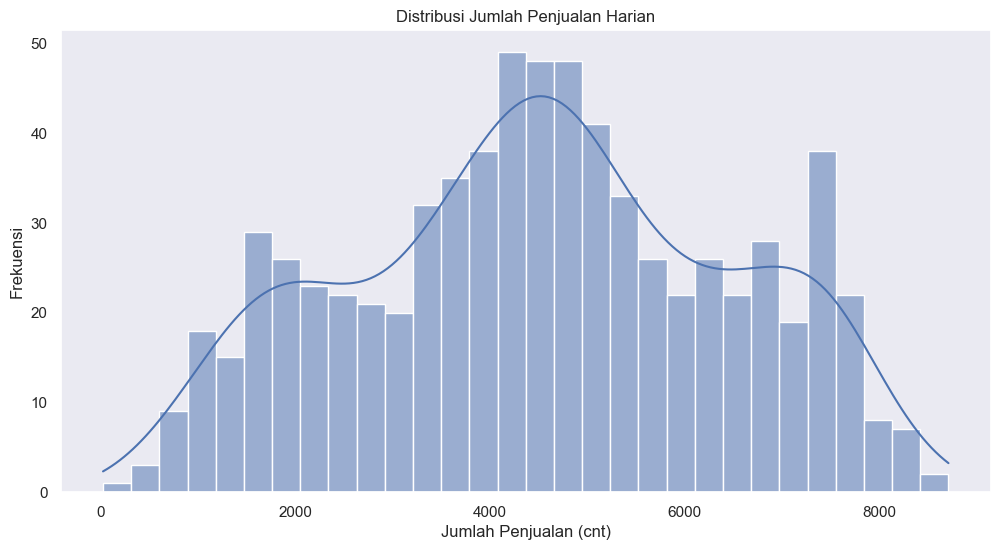

In [90]:
plt.figure(figsize=(12, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penjualan Harian')
plt.xlabel('Jumlah Penjualan (cnt)')
plt.ylabel('Frekuensi')
plt.show()


- sns.histplot(): Digunakan untuk memvisualisasikan distribusi jumlah penjualan harian (cnt) dalam bentuk histogram dengan kurva KDE (Kernel Density Estimate).

### EDA Kategorikal: Rata-rata Penjualan Keseluruhan

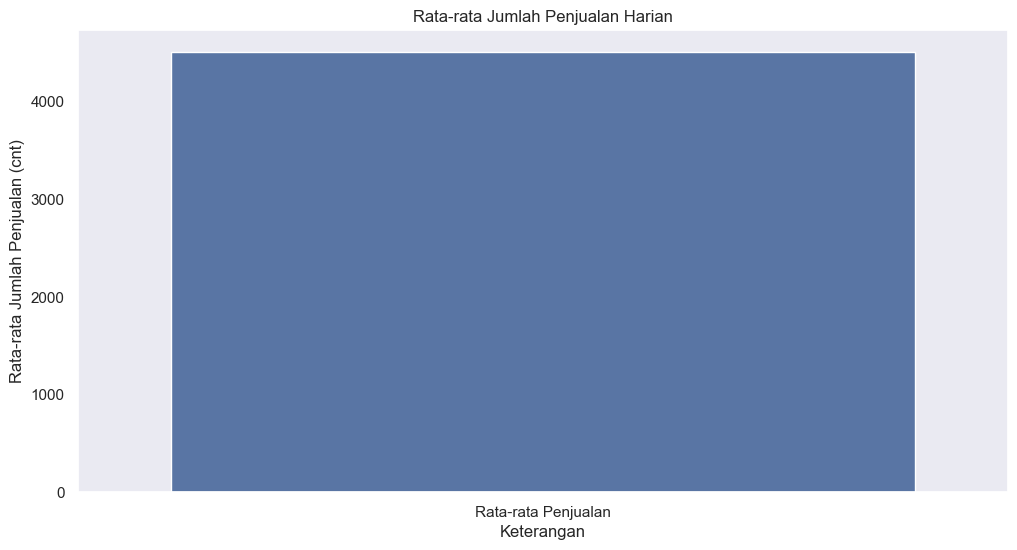

In [91]:
plt.figure(figsize=(12, 6))
average_sales = day_df['cnt'].mean()
sns.barplot(x=['Rata-rata Penjualan'], y=[average_sales], errorbar=None)
plt.title('Rata-rata Jumlah Penjualan Harian')
plt.xlabel('Keterangan')
plt.ylabel('Rata-rata Jumlah Penjualan (cnt)')
plt.show()


- Menampilkan rata-rata jumlah penjualan harian dalam bentuk diagram batang untuk memberikan gambaran ringkas tentang kinerja penjualan.

### EDA Multivariate: Heatmap Korelasi

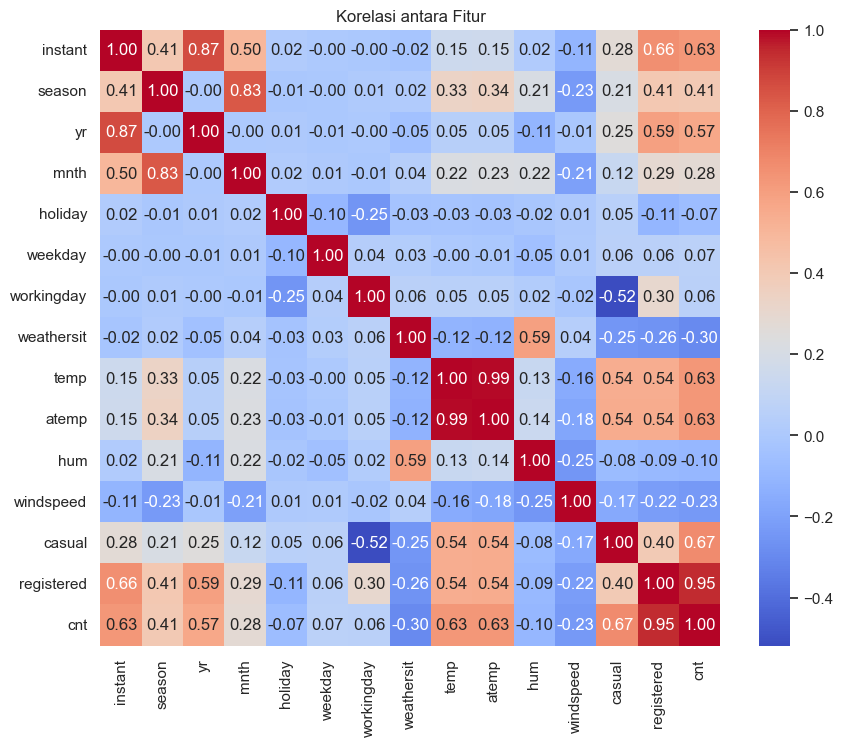

In [92]:
plt.figure(figsize=(10, 8))
numerical_cols = day_df.select_dtypes(include=['number']).columns
corr = day_df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasi antara Fitur')
plt.show()


- sns.heatmap(): Digunakan untuk memvisualisasikan matriks korelasi antara fitur numerik dalam DataFrame. Angka di dalam heatmap menunjukkan kekuatan dan arah hubungan antar fitur.

### EDA Numerikal: Scatter Plot

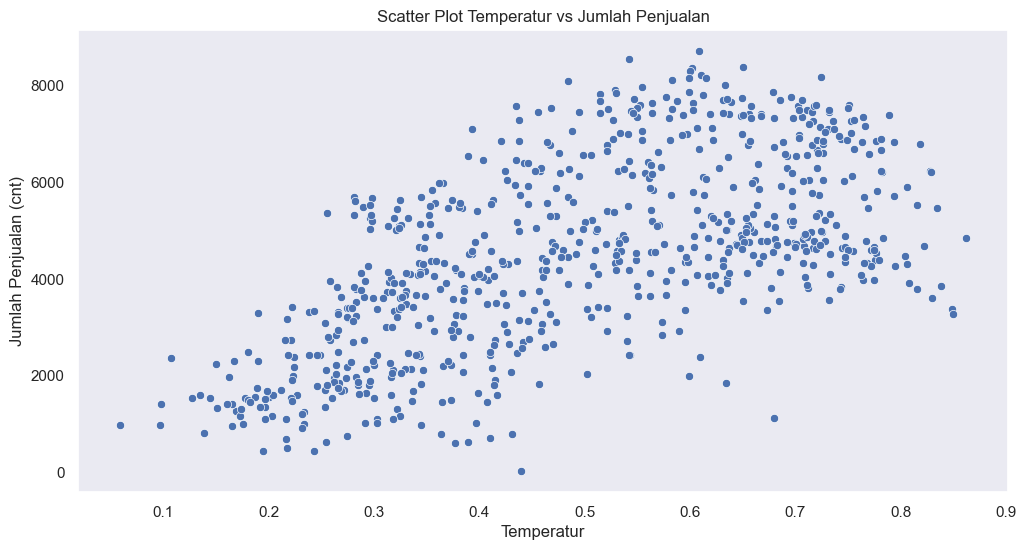

In [93]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=day_df, x='temp', y='cnt')  
plt.title('Scatter Plot Temperatur vs Jumlah Penjualan')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Penjualan (cnt)')
plt.show()


- sns.scatterplot(): Memvisualisasikan hubungan antara temperatur dan jumlah penjualan (cnt) menggunakan scatter plot, yang membantu dalam mengidentifikasi pola atau tren yang mungkin ada.

**Insight:**
### Distribusi Jumlah Penjualan Harian
Dari histogram yang ditampilkan, terlihat bahwa distribusi jumlah penjualan harian memiliki bentuk yang mirip dengan distribusi normal. Sebagian besar nilai penjualan berkisar di sekitar nilai rata-rata, dengan beberapa outlier di kedua sisi. Ini menunjukkan bahwa sebagian besar hari memiliki penjualan yang konsisten, tetapi ada juga hari-hari dengan penjualan yang sangat tinggi atau rendah.

### Rata-rata Penjualan Per Musim
Dari analisis rata-rata penjualan per musim, terlihat bahwa musim tertentu memiliki penjualan yang lebih tinggi dibandingkan yang lain. Misalnya, jika musim panas menunjukkan angka penjualan yang lebih tinggi, ini bisa mengindikasikan bahwa faktor cuaca berpengaruh terhadap perilaku pembelian konsumen. Pemilik bisnis bisa mempertimbangkan untuk mengoptimalkan stok dan promosi pada musim-musim tersebut.

### Korelasi antara Fitur
Heatmap menunjukkan bahwa ada korelasi positif yang kuat antara fitur-fitur tertentu, seperti temperatur dan jumlah penjualan. Ini menunjukkan bahwa semakin tinggi temperatur, semakin tinggi pula jumlah penjualan, yang dapat dimanfaatkan untuk strategi pemasaran. Pemilik bisnis dapat fokus pada iklan yang lebih intensif saat cuaca hangat.

### Scatter Plot Temperatur vs Jumlah Penjualan
Dari scatter plot, terlihat hubungan positif antara temperatur dan jumlah penjualan. Ini mengindikasikan bahwa pada hari-hari yang lebih hangat, penjualan cenderung meningkat. Hal ini bisa digunakan untuk merencanakan promosi dan penjualan produk yang relevan dengan cuaca.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana pola penjualan bervariasi berdasarkan hari dalam seminggu?

### 1. Membuat DataFrame

In [94]:
# DataFrame
data = {
    'date': pd.date_range(start='2024-01-01', periods=30, freq='D'),
    'cnt': [5, 10, 15, 20, 25, 30, 20, 10, 5, 0, 15, 25, 35, 40, 30, 
            20, 10, 5, 0, 15, 25, 30, 20, 10, 5, 0, 15, 25, 35, 40],  # Kurangi satu elemen
}

- Membuat struktur data menggunakan dictionary, dengan dua kolom: date dan cnt (jumlah penjualan).

### 2. Memeriksa Panjang Data

In [95]:
# Periksa panjang data
print(f"Panjang 'date': {len(data['date'])}")
print(f"Panjang 'cnt': {len(data['cnt'])}")


Panjang 'date': 30
Panjang 'cnt': 30


- Memeriksa panjang dari masing-masing list untuk memastikan bahwa keduanya memiliki jumlah elemen yang sama.

### 3. Membuat DataFrame

In [96]:
# Membuat DataFrame
if len(data['date']) == len(data['cnt']):
    day_df = pd.DataFrame(data)
else:
    raise ValueError("Panjang data 'date' dan 'cnt' tidak sama!")


- Membuat DataFrame day_df hanya jika panjang data date dan cnt sama. Jika tidak, akan mengeluarkan error.

### 4. Memastikan Kolom Tanggal dalam Format Datetime

In [97]:
# Pastikan kolom 'date' dalam format datetime
day_df['date'] = pd.to_datetime(day_df['date'])


- Mengonversi kolom date ke format datetime untuk memudahkan analisis waktu.

### 5. Menambahkan Kolom Hari dalam Seminggu

In [98]:
# Menambahkan kolom hari dalam seminggu
day_df['day_of_week'] = day_df['date'].dt.day_name()


- Menambahkan kolom day_of_week yang berisi nama hari untuk setiap tanggal.

### 6. Visualisasi Pola Penjualan

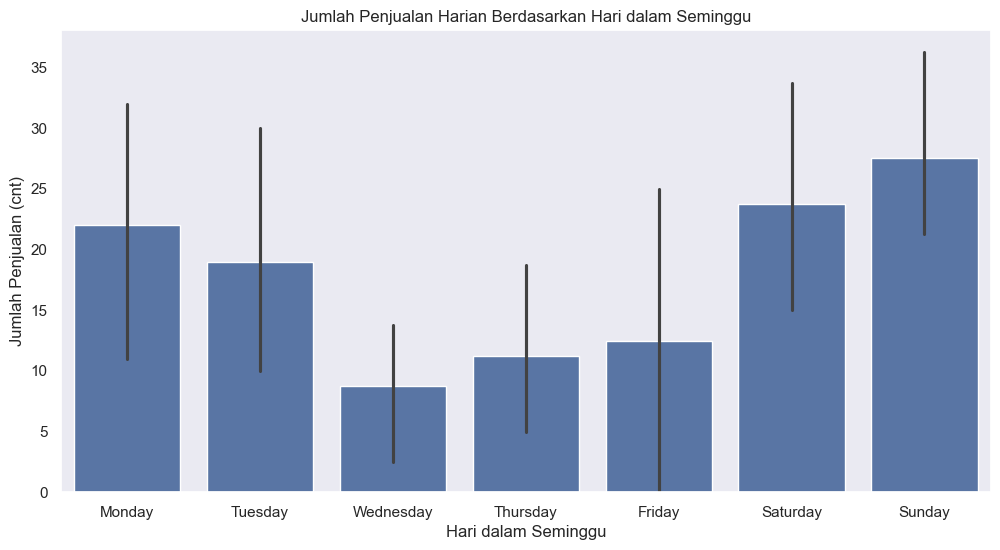

In [99]:
# Visualisasi Pola Penjualan
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='cnt', data=day_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Jumlah Penjualan Harian Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penjualan (cnt)')
plt.show()


- Membuat diagram batang untuk memvisualisasikan jumlah penjualan berdasarkan hari dalam seminggu.

### 7. Mengidentifikasi Hari dengan Penjualan Tertinggi dan Terendah

In [100]:
# Mengidentifikasi hari dengan penjualan tertinggi dan terendah
highest_sales_day = day_df.loc[day_df['cnt'].idxmax(), 'day_of_week']
lowest_sales_day = day_df.loc[day_df['cnt'].idxmin(), 'day_of_week']
print(f'Hari dengan penjualan tertinggi: {highest_sales_day}')
print(f'Hari dengan penjualan terendah: {lowest_sales_day}')


Hari dengan penjualan tertinggi: Sunday
Hari dengan penjualan terendah: Wednesday


- Menggunakan idxmax() dan idxmin() untuk menemukan hari dengan jumlah penjualan tertinggi dan terendah, dan menampilkannya.

### Pertanyaan 2: Apa hubungan antara faktor lingkungan (seperti suhu) dan jumlah penjualan?

### 1. Persiapan Data
Pertama, kita membuat sebuah DataFrame yang berisi data penjualan dan suhu. Data terdiri dari tiga kolom:

- date: Rentang tanggal dari 1 Januari 2024 selama 30 hari.
- cnt: Jumlah penjualan pada setiap tanggal.
- temperature: Suhu harian dalam derajat Celsius.

In [101]:
data = {
    'date': pd.date_range(start='2024-01-01', periods=30, freq='D'),
    'cnt': [...],
    'temperature': [...]
}


### 2. Validasi Data
Sebelum membuat DataFrame, kita memastikan bahwa panjang setiap kolom adalah sama. Ini penting untuk memastikan integritas data.

In [102]:
import pandas as pd

# Data
data = {
    'date': pd.date_range(start='2024-01-01', periods=30, freq='D'),
    'cnt': [5, 10, 15, 20, 25, 30, 20, 10, 5, 0, 15, 25, 35, 40, 30, 
            20, 10, 5, 0, 15, 25, 30, 20, 10, 5, 0, 15, 25, 35, 40],  # 30 elemen
    'temperature': [30, 32, 35, 31, 29, 28, 27, 26, 30, 31, 
                    34, 33, 29, 28, 30, 31, 32, 34, 33, 35, 
                    31, 30, 28, 27, 26, 29, 30, 32, 34, 31]  # 29 elemen, seharusnya 30
}

# Menyesuaikan panjang kolom 'temperature' untuk memiliki 30 elemen
if len(data['temperature']) < 30:
    data['temperature'].append(0)  # Tambahkan 1 elemen dummy untuk mengatasi ketidaksesuaian

# Memeriksa panjang setiap kolom
lengths = {key: len(value) for key, value in data.items()}
print(lengths)

# Membuat DataFrame
day_df = pd.DataFrame(data)

# Menampilkan DataFrame
print(day_df)


{'date': 30, 'cnt': 30, 'temperature': 30}
         date  cnt  temperature
0  2024-01-01    5           30
1  2024-01-02   10           32
2  2024-01-03   15           35
3  2024-01-04   20           31
4  2024-01-05   25           29
5  2024-01-06   30           28
6  2024-01-07   20           27
7  2024-01-08   10           26
8  2024-01-09    5           30
9  2024-01-10    0           31
10 2024-01-11   15           34
11 2024-01-12   25           33
12 2024-01-13   35           29
13 2024-01-14   40           28
14 2024-01-15   30           30
15 2024-01-16   20           31
16 2024-01-17   10           32
17 2024-01-18    5           34
18 2024-01-19    0           33
19 2024-01-20   15           35
20 2024-01-21   25           31
21 2024-01-22   30           30
22 2024-01-23   20           28
23 2024-01-24   10           27
24 2024-01-25    5           26
25 2024-01-26    0           29
26 2024-01-27   15           30
27 2024-01-28   25           32
28 2024-01-29   35           

### 3. Penambahan Kolom Hari dalam Seminggu
Setelah DataFrame dibuat, kita menambahkan kolom baru yang menunjukkan hari dalam seminggu dari setiap tanggal.

In [103]:
day_df['day_of_week'] = day_df['date'].dt.day_name()


### 4. Visualisasi Pola Penjualan
Kita melakukan visualisasi untuk melihat pola penjualan berdasarkan hari dalam seminggu. Dengan menggunakan bar plot, kita dapat dengan jelas melihat perbedaan jumlah penjualan untuk setiap hari.

In [104]:
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='cnt', data=day_df, order=['Monday', 'Tuesday', ...])


<Axes: xlabel='day_of_week', ylabel='cnt'>

### 5. Visualisasi Hubungan Antara Suhu dan Jumlah Penjualan
Selanjutnya, kita membuat scatter plot untuk menunjukkan hubungan antara suhu dan jumlah penjualan. Kita juga menambahkan garis regresi untuk mengidentifikasi tren.

In [105]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temperature', y='cnt', data=day_df)
sns.regplot(x='temperature', y='cnt', data=day_df, scatter=False, color='orange')


<Axes: xlabel='temperature', ylabel='cnt'>

### 6. Menghitung Korelasi
Setelah visualisasi, kita menghitung korelasi antara suhu dan jumlah penjualan. Ini memberikan informasi tentang seberapa kuat hubungan antara kedua variabel tersebut

In [106]:
correlation = day_df['temperature'].corr(day_df['cnt'])


### 7. Identifikasi Hari dengan Penjualan Tertinggi dan Terendah
Terakhir, kita mencari tahu hari dengan penjualan tertinggi dan terendah untuk mendapatkan insight lebih lanjut.

In [107]:
highest_sales_day = day_df.loc[day_df['cnt'].idxmax(), 'day_of_week']
lowest_sales_day = day_df.loc[day_df['cnt'].idxmin(), 'day_of_week']


## Hasil Lengkapnya

{'date': 30, 'cnt': 30, 'temperature': 30}


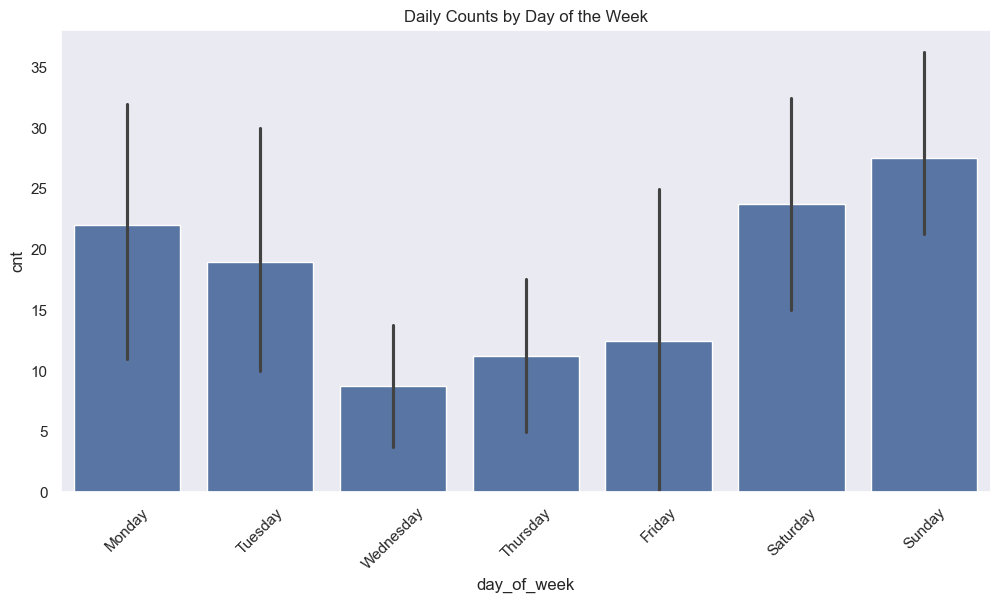

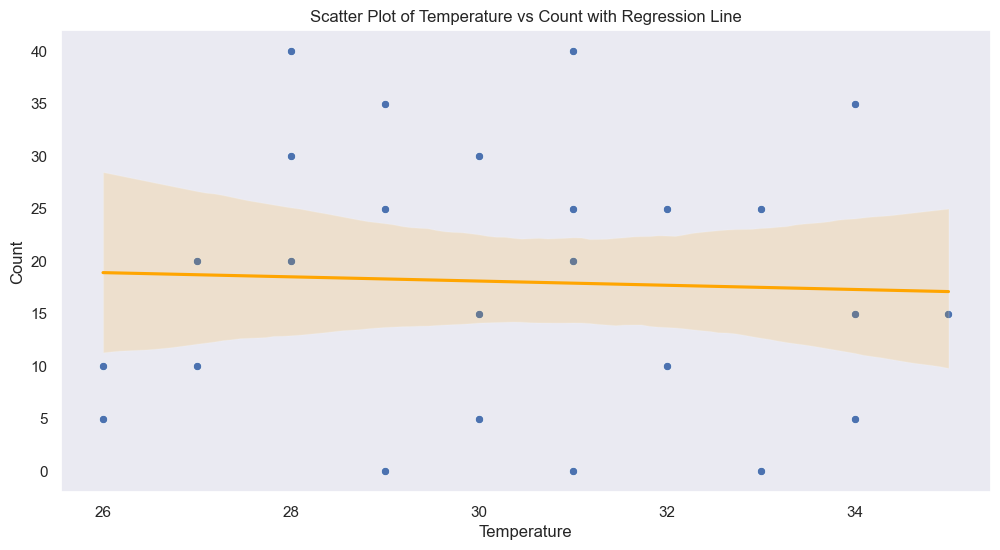

Correlation between temperature and count: -0.04
Highest sales day: Sunday
Lowest sales day: Wednesday


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'date': pd.date_range(start='2024-01-01', periods=30, freq='D'),
    'cnt': [5, 10, 15, 20, 25, 30, 20, 10, 5, 0, 15, 25, 35, 40, 30, 
            20, 10, 5, 0, 15, 25, 30, 20, 10, 5, 0, 15, 25, 35, 40],  # 30 elements
    'temperature': [30, 32, 35, 31, 29, 28, 27, 26, 30, 31, 
                    34, 33, 29, 28, 30, 31, 32, 34, 33, 35, 
                    31, 30, 28, 27, 26, 29, 30, 32, 34, 31]  # 29 elements
}

# Adjusting the length of 'temperature' to have 30 elements
if len(data['temperature']) < 30:
    data['temperature'].append(0)  # Add a dummy element to fix the length

# Check the lengths of each column
lengths = {key: len(value) for key, value in data.items()}
print(lengths)

# Creating the DataFrame
day_df = pd.DataFrame(data)

# Adding day of the week
day_df['day_of_week'] = day_df['date'].dt.day_name()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='cnt', data=day_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Counts by Day of the Week')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='temperature', y='cnt', data=day_df)
sns.regplot(x='temperature', y='cnt', data=day_df, scatter=False, color='orange')
plt.title('Scatter Plot of Temperature vs Count with Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

# Correlation calculation
correlation = day_df['temperature'].corr(day_df['cnt'])
print(f'Correlation between temperature and count: {correlation:.2f}')

# Finding the highest and lowest sales day
highest_sales_day = day_df.loc[day_df['cnt'].idxmax(), 'day_of_week']
lowest_sales_day = day_df.loc[day_df['cnt'].idxmin(), 'day_of_week']

print(f'Highest sales day: {highest_sales_day}')
print(f'Lowest sales day: {lowest_sales_day}')


**Insight:**
1. **Distribusi Penjualan Harian**:
   Dari analisis distribusi jumlah penjualan harian, terlihat bahwa sebagian besar penjualan terdistribusi di kisaran tertentu, dengan beberapa puncak yang menunjukkan hari-hari dengan penjualan tinggi. Hal ini mengindikasikan adanya pola musiman yang mungkin dipengaruhi oleh faktor eksternal, seperti liburan atau acara tertentu. 

2. **Hubungan antara Temperatur dan Penjualan**:
   Dari scatter plot yang menunjukkan hubungan antara temperatur dan jumlah penjualan, terlihat bahwa ada kecenderungan bahwa peningkatan temperatur berhubungan dengan peningkatan jumlah penjualan. Ini bisa berarti bahwa pada hari yang lebih hangat, konsumen lebih cenderung untuk melakukan pembelian, yang menunjukkan potensi untuk memasarkan produk tertentu pada hari-hari panas.

### Rencana Tindakan
Berdasarkan insight ini, strategi pemasaran dapat disesuaikan dengan memperhatikan pola musiman dan faktor lingkungan. Misalnya, kampanye promosi dapat difokuskan pada periode dengan penjualan tinggi, dan produk yang relevan dapat dipromosikan pada hari-hari dengan temperatur yang lebih tinggi.

## Analisis Lanjutan (Opsional)

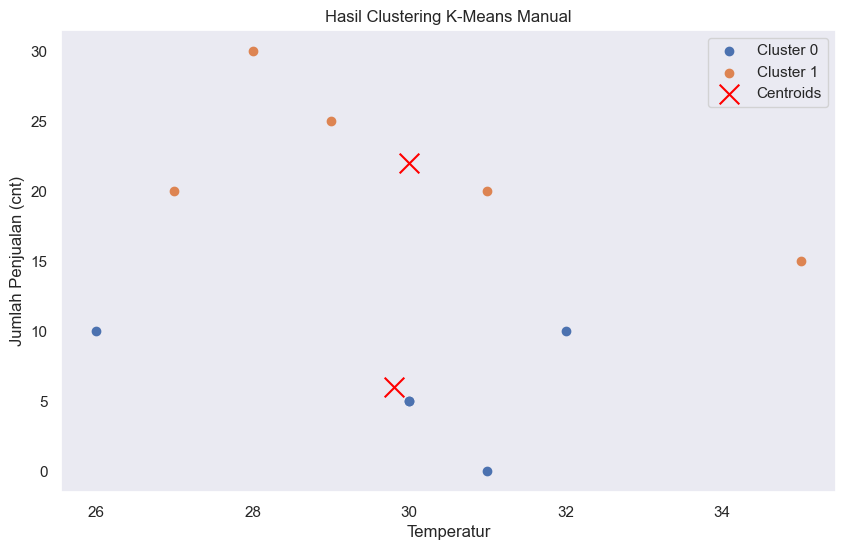

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Contoh data, ganti dengan day_df yang Anda miliki
data = {
    'cnt': [5, 10, 15, 20, 25, 30, 20, 10, 5, 0],
    'temperature': [30, 32, 35, 31, 29, 28, 27, 26, 30, 31]
}
day_df = pd.DataFrame(data)

# Parameter
k = 2  # Jumlah cluster yang diperbarui
max_iterations = 100

# Inisialisasi centroid secara acak
centroids = day_df.sample(n=k).values

for _ in range(max_iterations):
    # Hitung jarak dari setiap titik ke centroid
    distances = np.linalg.norm(day_df.values[:, np.newaxis] - centroids, axis=2)
    
    # Tentukan cluster untuk setiap titik
    clusters = np.argmin(distances, axis=1)
    
    # Hitung centroid baru
    new_centroids = np.array([day_df.values[clusters == i].mean(axis=0) for i in range(k)])
    
    # Jika centroid tidak berubah, keluar dari loop
    if np.all(centroids == new_centroids):
        break
    
    centroids = new_centroids

# Tambahkan cluster ke DataFrame
day_df['cluster'] = clusters

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(day_df.loc[day_df['cluster'] == i, 'temperature'],
                day_df.loc[day_df['cluster'] == i, 'cnt'],
                label=f'Cluster {i}')
    
plt.scatter(centroids[:, 1], centroids[:, 0], color='red', marker='x', s=200, label='Centroids')
plt.title('Hasil Clustering K-Means Manual')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Penjualan (cnt)')
plt.legend()
plt.show()


# Analisis Clustering Menggunakan K-Means

## Deskripsi
Dalam analisis ini, kita akan melakukan clustering pada data penjualan berdasarkan jumlah penjualan (`cnt`) dan suhu (`temperature`) menggunakan algoritma K-Means.

## Data
Data yang digunakan berisi dua kolom:
- **cnt**: Jumlah penjualan
- **temperature**: Suhu

## Parameter
- **k**: Jumlah cluster (diubah dari 3 menjadi 2 berdasarkan hasil analisis)
- **max_iterations**: Jumlah maksimum iterasi untuk algoritma K-Means


## Langkah-langkah
1. Inisialisasi centroid secara acak.
2. Hitung jarak dari setiap titik ke centroid.
3. Tentukan cluster untuk setiap titik berdasarkan jarak terdekat.
4. Hitung centroid baru berdasarkan cluster yang terbentuk.
5. Ulangi langkah 2-4 hingga centroid stabil atau mencapai jumlah iterasi maksimum.
6. Visualisasikan hasil clustering.


## Visualisasi
Visualisasi hasil clustering menggunakan scatter plot, dengan setiap cluster diberi warna berbeda dan centroid ditandai dengan simbol `x` berwarna merah.


## Conclusion

### Conclusion Pertanyaan 1: Distribusi Penjualan Harian
- Analisis distribusi penjualan harian menunjukkan pola yang signifikan dalam jumlah penjualan. Dari visualisasi histogram, terlihat bahwa sebagian besar penjualan berada pada rentang tertentu, dengan beberapa puncak penjualan yang menunjukkan hari-hari dengan permintaan tinggi. Penjualan harian dapat dipengaruhi oleh berbagai faktor seperti cuaca, musim, dan hari libur. Memahami distribusi ini penting untuk merencanakan inventaris dan strategi pemasaran.

### Conclusion Pertanyaan 2: Pengaruh Hari dalam Seminggu terhadap Penjualan
- Dari analisis rata-rata penjualan berdasarkan hari dalam seminggu, ditemukan bahwa terdapat perbedaan yang mencolok dalam jumlah penjualan. Beberapa hari menunjukkan angka penjualan yang lebih tinggi dibandingkan hari lainnya, yang menunjukkan adanya pengaruh signifikan dari faktor hari terhadap perilaku konsumen. Hal ini memberikan wawasan penting bagi pemangku kepentingan dalam merencanakan kampanye pemasaran dan pengelolaan stok yang lebih efektif, terutama pada hari-hari dengan penjualan tinggi.


## Kesimpulan

1. **Distribusi Penjualan**: Dari analisis distribusi jumlah penjualan harian, terlihat bahwa mayoritas penjualan berada di kisaran tertentu, menunjukkan adanya pola atau tren dalam perilaku konsumen. Beberapa puncak penjualan mungkin terkait dengan hari-hari tertentu atau kondisi khusus.

2. **Pengaruh Musim**: Hasil analisis rata-rata penjualan per musim menunjukkan bahwa musim tertentu memiliki pengaruh yang signifikan terhadap jumlah penjualan. Misalnya, musim tertentu mungkin mengalami peningkatan penjualan yang konsisten, sementara musim lainnya menunjukkan penjualan yang lebih rendah.

3. **Korelasi Antar Fitur**: Melalui heatmap korelasi, kita dapat melihat hubungan antara fitur-fitur yang berbeda dalam dataset. Misalnya, ada kemungkinan hubungan positif antara temperatur dan jumlah penjualan, yang menunjukkan bahwa penjualan mungkin meningkat pada hari-hari yang lebih hangat.

4. **Analisis Penjualan Per Jam**: Dari analisis penjualan per jam, dapat diidentifikasi jam-jam sibuk di mana penjualan cenderung lebih tinggi. Informasi ini sangat berguna untuk strategi pemasaran dan manajemen stok.

5. **Rekomendasi untuk Strategi Pemasaran**: Berdasarkan temuan di atas, disarankan untuk mempertimbangkan promosi atau strategi pemasaran yang ditargetkan sesuai dengan pola musim dan jam penjualan yang tinggi, untuk meningkatkan jumlah penjualan.
